<a href="https://colab.research.google.com/github/Vinuji-Hewapathirana/Machine-Learning---Coursework/blob/main/ML_RFC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop the 'duration' column
data = data.drop(columns=['duration','contact'])

# Display the first few rows to verify
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#Prepare features and target
X = data.drop(columns=['y'])
y = data['y']

print(f"Input features (X): {X.shape}")
print(f"Target variable (y): {y.shape}")

#encoding the y attribute
y_encoded = y.map({'yes':1, 'no':0})
print(y_encoded.head())

Input features (X): (41188, 18)
Target variable (y): (41188,)
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report for Unified Model
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.56      0.27      0.37       928

    accuracy                           0.89      8238
   macro avg       0.74      0.62      0.66      8238
weighted avg       0.87      0.89      0.88      8238

ROC-AUC Score for Unified Model: 0.7767726366809755


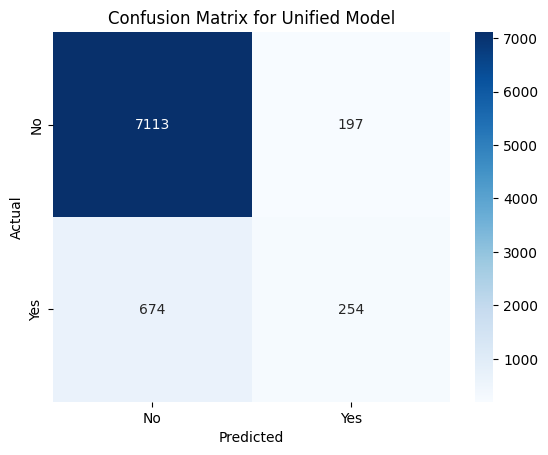


Top 10 Important Features After Reduction:
            Feature  Importance
7         euribor3m    0.113266
1          campaign    0.081117
0               age    0.072999
8       nr.employed    0.061668
4      emp.var.rate    0.053030
6     cons.conf.idx    0.026472
5    cons.price.idx    0.025167
52  day_of_week_fri    0.025167
53  day_of_week_mon    0.024465
56  day_of_week_wed    0.023629


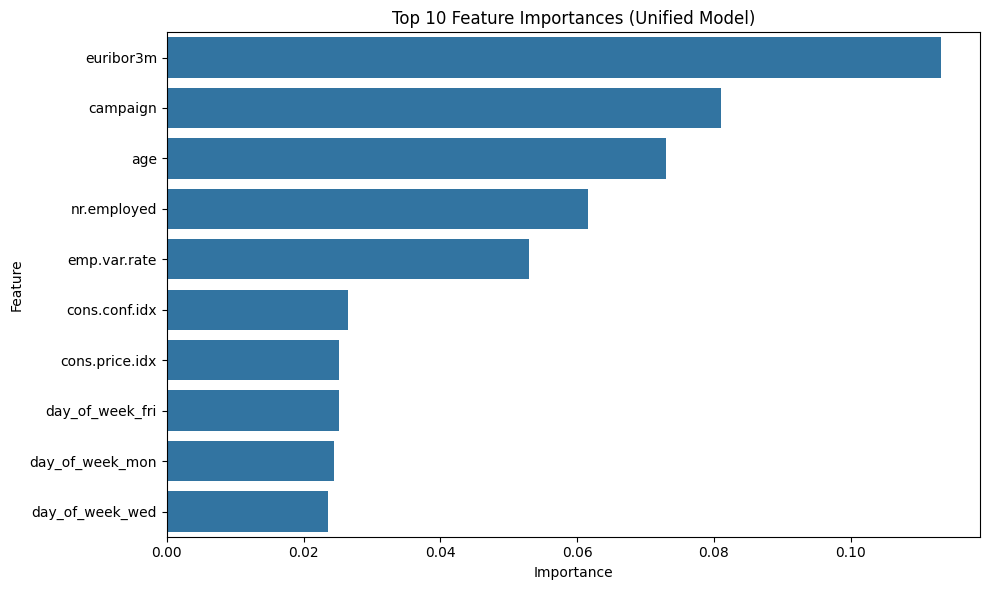

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imbalanced-learn's Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Step 1: Initial Pipeline with SMOTE and RandomForestClassifier
initial_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),   # Preprocessing
    ('smote', smote),                 # SMOTE oversampling
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))  # Random Forest
])

# Train the pipeline
initial_pipeline.fit(X_train, y_train)

# Step 2: Feature Importance Extraction
model = initial_pipeline.named_steps['classifier']
categorical_feature_names = initial_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select features with importance above a threshold
important_features = importance_df[importance_df['Importance'] > 0.01]['Feature'].values

# Transform the dataset using the preprocessor
X_train_transformed = initial_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = initial_pipeline.named_steps['preprocessor'].transform(X_test)

# Convert the transformed datasets to DataFrames
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Filter the reduced dataset
X_train_reduced = X_train_transformed[important_features]
X_test_reduced = X_test_transformed[important_features]

# Step 3: Final Pipeline with Reduced Features
final_pipeline = ImbPipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the final model
final_pipeline.fit(X_train_reduced, y_train)

# Evaluate the final model
y_pred = final_pipeline.predict(X_test_reduced)
y_prob = final_pipeline.predict_proba(X_test_reduced)[:, 1]

print("Classification Report for Unified Model")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score for Unified Model:", roc_auc_score(y_test, y_prob))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Unified Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display top 10 features after reduction
print("\nTop 10 Important Features After Reduction:")
print(importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances (Unified Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()